In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churning Customers/CustomerChurn_dataset.csv')

The next two lines of code investigate the data using descriptive statistics and visualizations:These parts provide us a fundamental grasp of the data and its properties.

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The following piece of code depicts the distribution of the 'Churn' target variable based on several characteristics:
These representations assist us in comprehending the link between the target variable and many factors.



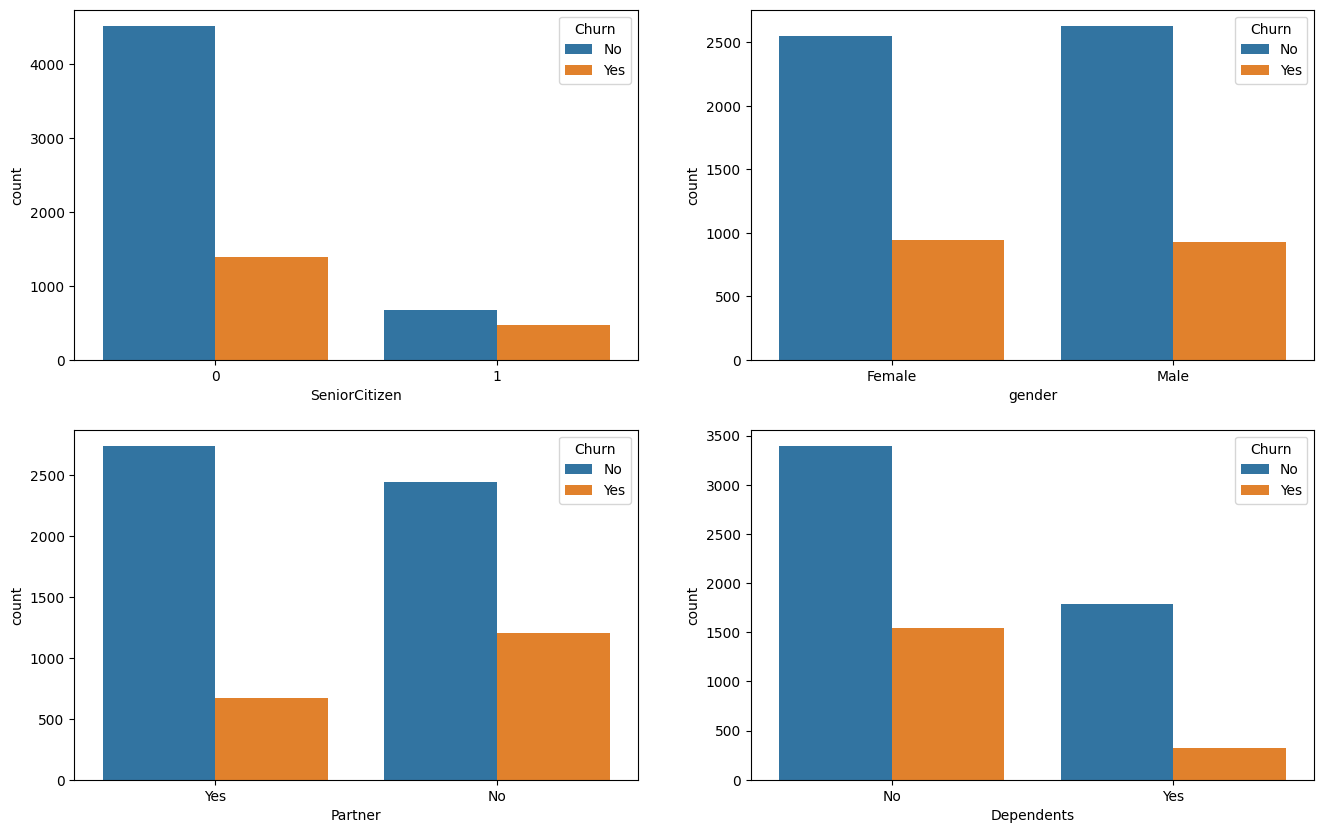

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Churn based on different features
plt.figure(figsize=(16, 10))

# Example: Senior Citizen, Gender, Partner, and Dependents
plt.subplot(2, 2, 1)
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)

plt.subplot(2, 2, 2)
sns.countplot(x='gender', hue='Churn', data=data)

plt.subplot(2, 2, 3)
sns.countplot(x='Partner', hue='Churn', data=data)

plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', hue='Churn', data=data)

plt.show()



A frequent preprocessing step in machine learning is feature separation depending on data type.
It enables specialized preprocessing of numeric and categorical variables, which may require distinct treatments (for example, scaling for numeric features and encoding for categorical features).


In [6]:

# Separate numeric and categorical features
numeric_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(exclude=['number']).columns

print("Numeric Features:")
print(numeric_features)

Numeric Features:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [7]:
print("Categorical Features:")
print(categorical_features)

Categorical Features:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


LabelEncoder is used in this code to translate category characteristics to numerical representation. Each category is given a unique number. The for loop processes columns with object data types, converting them using fit_transform. This is required before utilizing the data in machine learning models that need numerical input.


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])


Using the corr() function, this code computes the correlation matrix for the dataset. The generated matrix displays the coefficients of pairwise correlation between numerical features. It sheds light on the connections between the variables in the dataset. The print(correlation_matrix) line prints the correlation matrix to the console, allowing you to quickly examine feature interactions.


In [9]:
correlation_matrix = data.corr()
print(correlation_matrix)

                  customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.02139

Using the corr() function, this code computes the correlation matrix for the dataset. The generated matrix displays the coefficients of pairwise correlation between numerical features. It sheds light on the connections between the variables in the dataset. The print(correlation_matrix) line prints the correlation matrix to the console, allowing you to quickly examine feature interactions.


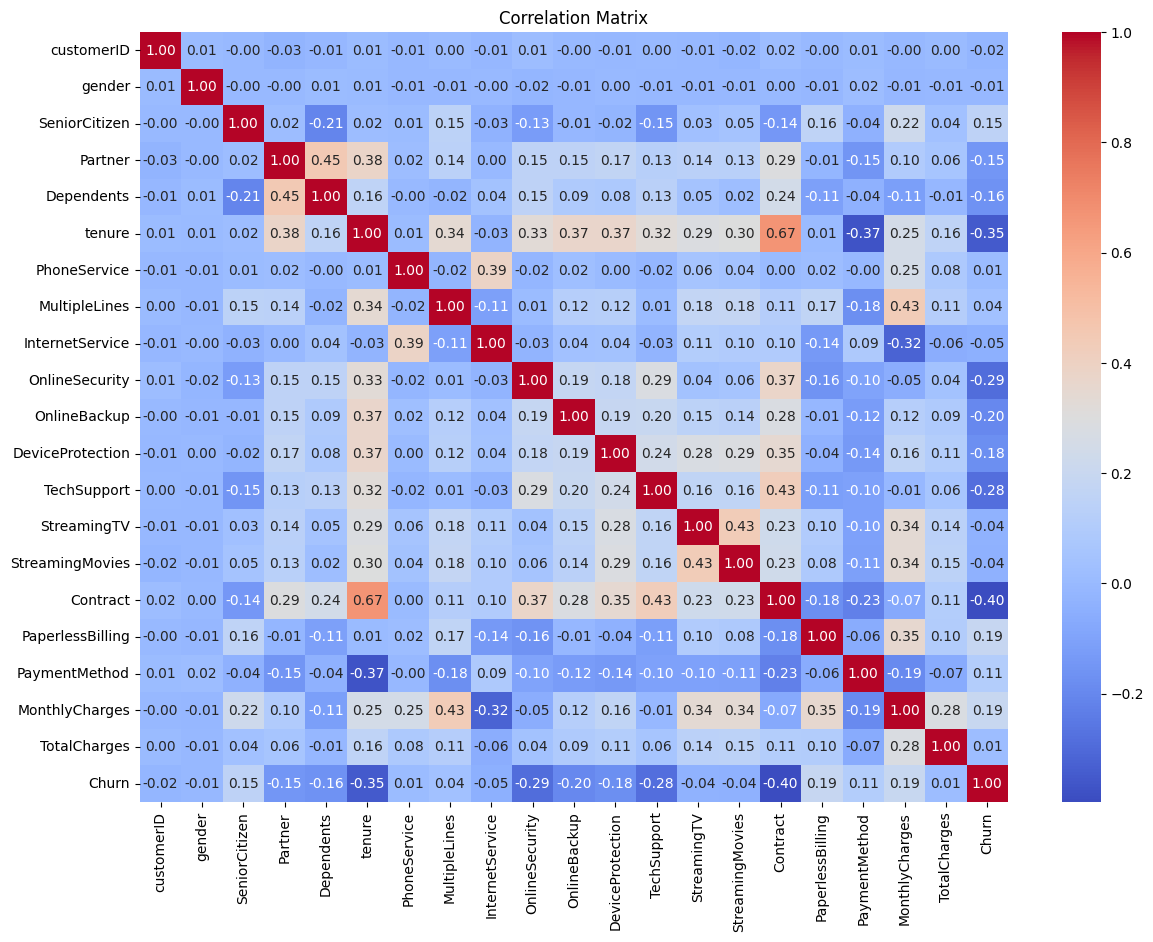

In [10]:
# Display the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify the top correlated features with the target variable (Churn)
top_correlated_features_churn = correlation_matrix['Churn'].abs().sort_values(ascending=False).head(12)
print("Top Correlated Features with Churn:")
print(top_correlated_features_churn)

# Identify the top correlated features with each other
threshold = 0.7  # Adjust the threshold as needed
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Pick the top 12 correlated features
top_correlated_features_all = list(top_correlated_features_churn.index) + list(correlated_features)[:13]
print("Top 11 Correlated Features:")
print(top_correlated_features_all)

# Extract the top 12 features from the dataset
selected_features = data[top_correlated_features_all]


In [ ]:
selected_features.info()

This short code does the same function as your original code. It generates the features (X) by omitting the 'Churn' column from selected_features and assigns the 'Churn' column to the target variable (y).


In [11]:
X = selected_features.drop("Churn", axis=1)  # Features
y = selected_features['Churn']  # Target variable

Top Correlated Features with Churn:
Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
Name: Churn, dtype: float64
Top 12 Correlated Features:
['Churn', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'MonthlyCharges', 'PaperlessBilling', 'DeviceProtection', 'Dependents', 'SeniorCitizen', 'Partner']


This code snippet uses scikit-learn's StandardScaler to standardize the features in selected_features. It then uses the train_test_split function to divide the data into training and testing sets (X_train, X_test, y_train, y_test), with 20% of the data retained for testing and a random seed for repeatability.


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install scikeras

This code uses Keras to create a basic Multi-Layer Perceptron (MLP) neural network using scikit-learn's GridSearchCV for hyperparameter tweaking. An input layer, three hidden layers with increasing units, and an output layer with sigmoid activation for binary classification comprise the architecture. It then uses 5-fold stratified cross-validation to do a grid search across the provided hyperparameters (epochs, batch_size, optimizer, and validation_split). Optimizing for accuracy yields the optimal hyperparameters. The best model that results is trained using the given training data (X_train, y_train).


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier

def create_mlp_model(input_shape, optimizer='adam'):
    inputs = Input(shape=(input_shape,))
    hidden_layer1 = Dense(64, activation='relu')(inputs)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(16, activation='relu')(hidden_layer2)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer3)

    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the MLP model with verbose=1 to see epoch results
mlp_classifier = KerasClassifier(build_fn=create_mlp_model, input_shape=X_train.shape[1], verbose=1)

# Initialize GridSearchCV with the updated parameter grid
param_grid = {
    'epochs': [10, 20],
    'batch_size': [32, 64],
    'optimizer': ['adam', 'rmsprop'],
    'validation_split': [0.1, 0.2]
}

# Initialize StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_cv = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', verbose=0)

# Fit the GridSearchCV to the data
grid_search_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
127/127 [==============================] - 2s 8ms/step - loss: 0.6137 - accuracy: 0.7510 - val_loss: 0.4231 - val_accuracy: 0.8049
Epoch 2/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4596 - accuracy: 0.7798 - val_loss: 0.4069 - val_accuracy: 0.8071
Epoch 3/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4509 - accuracy: 0.7833 - val_loss: 0.4165 - val_accuracy: 0.7849
Epoch 4/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4394 - accuracy: 0.7865 - val_loss: 0.4848 - val_accuracy: 0.7761
Epoch 5/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4381 - accuracy: 0.7917 - val_loss: 0.4438 - val_accuracy: 0.7960
Epoch 6/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4421 - accuracy: 0.7813 - val_loss: 0.4164 - val_accuracy: 0.7916
Epoch 7/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4354 - accuracy: 0.7862 - val_loss: 0.4064 - val_accuracy: 0.8115
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
127/127 [==============================] - 5s 11ms/step - loss: 0.5721 - accuracy: 0.7488 - val_loss: 0.4549 - val_accuracy: 0.7694
Epoch 2/10
127/127 [==============================] - 1s 7ms/step - loss: 0.4556 - accuracy: 0.7862 - val_loss: 0.4155 - val_accuracy: 0.7982
Epoch 3/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4587 - accuracy: 0.7821 - val_loss: 0.4342 - val_accuracy: 0.8160
Epoch 4/10
127/127 [==============================] - 1s 7ms/step - loss: 0.4534 - accuracy: 0.7793 - val_loss: 0.4092 - val_accuracy: 0.8115
Epoch 5/10
127/127 [==============================] - 1s 7ms/step - loss: 0.4391 - accuracy: 0.7880 - val_loss: 0.4089 - val_accuracy: 0.8160
Epoch 6/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4506 - accuracy: 0.7788 - val_loss: 0.4311 - val_accuracy: 0.8204
Epoch 7/10
127/127 [==============================] - 1s 6ms/step - loss: 0.4432 - accuracy: 0.7902 - val_loss: 0.4460 - val_accuracy: 0.7627
Epoch

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
127/127 [==============================] - 4s 12ms/step - loss: 0.4848 - accuracy: 0.7626 - val_loss: 0.4337 - val_accuracy: 0.8115
Epoch 2/10
127/127 [==============================] - 1s 8ms/step - loss: 0.4642 - accuracy: 0.7779 - val_loss: 0.4323 - val_accuracy: 0.7960
Epoch 3/10
127/127 [==============================] - 1s 9ms/step - loss: 0.4460 - accuracy: 0.7840 - val_loss: 0.4357 - val_accuracy: 0.8049
Epoch 4/10
127/127 [==============================] - 1s 11ms/step - loss: 0.4421 - accuracy: 0.7828 - val_loss: 0.4270 - val_accuracy: 0.8182
Epoch 5/10
127/127 [==============================] - 2s 14ms/step - loss: 0.4447 - accuracy: 0.7821 - val_loss: 0.4259 - val_accuracy: 0.8004
Epoch 6/10
127/127 [==============================] - 1s 8ms/step - loss: 0.4408 - accuracy: 0.7892 - val_loss: 0.4488 - val_accuracy: 0.7605
Epoch 7/10
127/127 [==============================] - 1s 7ms/step - loss: 0.4460 - accuracy: 0.7860 - val_loss: 0.4152 - val_accuracy: 0.8160
Epo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.4931 - accuracy: 0.7557 - val_loss: 0.4750 - val_accuracy: 0.8004
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7823 - val_loss: 0.4428 - val_accuracy: 0.7916
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7899 - val_loss: 0.4286 - val_accuracy: 0.7938
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7811 - val_loss: 0.4346 - val_accuracy: 0.7938
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.7845 - val_loss: 0.4422 - val_accuracy: 0.8071
Epoch 6/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7894 - val_loss: 0.4210 - val_accuracy: 0.8071
Epoch 7/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7946 - val_loss: 0.4254 - val_accuracy: 0.8115
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 6ms/step - loss: 0.6521 - accuracy: 0.7239 - val_loss: 0.4376 - val_accuracy: 0.7894
Epoch 2/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7735 - val_loss: 0.4216 - val_accuracy: 0.7938
Epoch 3/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4555 - accuracy: 0.7782 - val_loss: 0.4172 - val_accuracy: 0.8004
Epoch 4/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4517 - accuracy: 0.7870 - val_loss: 0.4179 - val_accuracy: 0.8027
Epoch 5/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.7848 - val_loss: 0.4242 - val_accuracy: 0.7982
Epoch 6/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4447 - accuracy: 0.7900 - val_loss: 0.4910 - val_accuracy: 0.7206
Epoch 7/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.7863 - val_loss: 0.4206 - val_accuracy: 0.7960
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 5ms/step - loss: 0.6694 - accuracy: 0.7029 - val_loss: 0.4639 - val_accuracy: 0.7661
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7831 - val_loss: 0.4340 - val_accuracy: 0.8038
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7839 - val_loss: 0.4127 - val_accuracy: 0.8004
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7872 - val_loss: 0.4111 - val_accuracy: 0.8016
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7920 - val_loss: 0.4036 - val_accuracy: 0.7982
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.7886 - val_loss: 0.4110 - val_accuracy: 0.8038
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.7886 - val_loss: 0.4126 - val_accuracy: 0.7838
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 4ms/step - loss: 0.6229 - accuracy: 0.7465 - val_loss: 0.4708 - val_accuracy: 0.7517
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7820 - val_loss: 0.4316 - val_accuracy: 0.7938
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7770 - val_loss: 0.4218 - val_accuracy: 0.8016
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.7864 - val_loss: 0.4343 - val_accuracy: 0.7927
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7895 - val_loss: 0.4080 - val_accuracy: 0.8027
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.7856 - val_loss: 0.4182 - val_accuracy: 0.8038
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.7931 - val_loss: 0.4106 - val_accuracy: 0.8082
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 7ms/step - loss: 0.7903 - accuracy: 0.7160 - val_loss: 0.4522 - val_accuracy: 0.7882
Epoch 2/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4653 - accuracy: 0.7748 - val_loss: 0.4381 - val_accuracy: 0.7805
Epoch 3/10
113/113 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.7786 - val_loss: 0.4599 - val_accuracy: 0.7406
Epoch 4/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4523 - accuracy: 0.7825 - val_loss: 0.4375 - val_accuracy: 0.7627
Epoch 5/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4481 - accuracy: 0.7828 - val_loss: 0.4222 - val_accuracy: 0.7927
Epoch 6/10
113/113 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.7825 - val_loss: 0.4228 - val_accuracy: 0.8016
Epoch 7/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4418 - accuracy: 0.7875 - val_loss: 0.4214 - val_accuracy: 0.8016
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 5ms/step - loss: 0.5624 - accuracy: 0.7409 - val_loss: 0.5179 - val_accuracy: 0.7295
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7875 - val_loss: 0.4365 - val_accuracy: 0.7993
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7903 - val_loss: 0.4250 - val_accuracy: 0.7949
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7906 - val_loss: 0.4229 - val_accuracy: 0.7894
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7886 - val_loss: 0.4357 - val_accuracy: 0.7927
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7889 - val_loss: 0.4706 - val_accuracy: 0.7916
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.7942 - val_loss: 0.4339 - val_accuracy: 0.7871
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 7ms/step - loss: 0.5647 - accuracy: 0.7496 - val_loss: 0.4633 - val_accuracy: 0.7616
Epoch 2/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4800 - accuracy: 0.7793 - val_loss: 0.4362 - val_accuracy: 0.7849
Epoch 3/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7837 - val_loss: 0.4231 - val_accuracy: 0.7827
Epoch 4/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.7859 - val_loss: 0.4198 - val_accuracy: 0.7971
Epoch 5/10
113/113 [==============================] - 1s 4ms/step - loss: 0.4634 - accuracy: 0.7823 - val_loss: 0.4218 - val_accuracy: 0.7905
Epoch 6/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7867 - val_loss: 0.4211 - val_accuracy: 0.7905
Epoch 7/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7854 - val_loss: 0.4299 - val_accuracy: 0.7882
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.5586 - accuracy: 0.7537 - val_loss: 0.4236 - val_accuracy: 0.7960
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7798 - val_loss: 0.4186 - val_accuracy: 0.8093
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7875 - val_loss: 0.4164 - val_accuracy: 0.7982
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7825 - val_loss: 0.4043 - val_accuracy: 0.8049
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7939 - val_loss: 0.4075 - val_accuracy: 0.8071
Epoch 6/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.7887 - val_loss: 0.4078 - val_accuracy: 0.8071
Epoch 7/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.7850 - val_loss: 0.4161 - val_accuracy: 0.8004
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.5364 - accuracy: 0.7618 - val_loss: 0.4963 - val_accuracy: 0.7428
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7727 - val_loss: 0.4326 - val_accuracy: 0.8115
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7818 - val_loss: 0.4141 - val_accuracy: 0.8049
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7855 - val_loss: 0.4223 - val_accuracy: 0.7894
Epoch 5/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4459 - accuracy: 0.7825 - val_loss: 0.4123 - val_accuracy: 0.8115
Epoch 6/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4452 - accuracy: 0.7816 - val_loss: 0.4069 - val_accuracy: 0.8204
Epoch 7/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.7922 - val_loss: 0.4166 - val_accuracy: 0.8027
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 3s 7ms/step - loss: 0.5688 - accuracy: 0.7505 - val_loss: 0.4551 - val_accuracy: 0.7894
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7860 - val_loss: 0.5005 - val_accuracy: 0.7361
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7806 - val_loss: 0.4302 - val_accuracy: 0.7960
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7793 - val_loss: 0.4395 - val_accuracy: 0.8160
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7774 - val_loss: 0.4373 - val_accuracy: 0.7805
Epoch 6/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7796 - val_loss: 0.4226 - val_accuracy: 0.8204
Epoch 7/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7855 - val_loss: 0.4312 - val_accuracy: 0.8004
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.7781 - accuracy: 0.7110 - val_loss: 0.4565 - val_accuracy: 0.7894
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7855 - val_loss: 0.4428 - val_accuracy: 0.7982
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.7880 - val_loss: 0.4339 - val_accuracy: 0.7960
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7892 - val_loss: 0.4266 - val_accuracy: 0.7938
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7890 - val_loss: 0.4325 - val_accuracy: 0.7783
Epoch 6/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7968 - val_loss: 0.4234 - val_accuracy: 0.8027
Epoch 7/10
127/127 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7954 - val_loss: 0.4522 - val_accuracy: 0.7761
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 7ms/step - loss: 0.6204 - accuracy: 0.7257 - val_loss: 0.4519 - val_accuracy: 0.7916
Epoch 2/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4848 - accuracy: 0.7740 - val_loss: 0.4385 - val_accuracy: 0.7982
Epoch 3/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4705 - accuracy: 0.7838 - val_loss: 0.4414 - val_accuracy: 0.7960
Epoch 4/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4602 - accuracy: 0.7860 - val_loss: 0.4204 - val_accuracy: 0.7960
Epoch 5/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.7858 - val_loss: 0.4244 - val_accuracy: 0.7916
Epoch 6/10
127/127 [==============================] - 1s 5ms/step - loss: 0.4461 - accuracy: 0.7890 - val_loss: 0.4151 - val_accuracy: 0.8027
Epoch 7/10
127/127 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.7890 - val_loss: 0.4183 - val_accuracy: 0.8004
Epoch 8/10
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.7184 - val_loss: 0.4324 - val_accuracy: 0.7927
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7820 - val_loss: 0.4153 - val_accuracy: 0.7938
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7875 - val_loss: 0.4076 - val_accuracy: 0.7927
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7764 - val_loss: 0.4289 - val_accuracy: 0.7993
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7828 - val_loss: 0.4703 - val_accuracy: 0.7472
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.7911 - val_loss: 0.4045 - val_accuracy: 0.7982
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.7861 - val_loss: 0.4144 - val_accuracy: 0.8049
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 5ms/step - loss: 0.5467 - accuracy: 0.7553 - val_loss: 0.4322 - val_accuracy: 0.7993
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7770 - val_loss: 0.4477 - val_accuracy: 0.7938
Epoch 3/10
113/113 [==============================] - 1s 6ms/step - loss: 0.4535 - accuracy: 0.7798 - val_loss: 0.4240 - val_accuracy: 0.7927
Epoch 4/10
113/113 [==============================] - 1s 6ms/step - loss: 0.4555 - accuracy: 0.7784 - val_loss: 0.4295 - val_accuracy: 0.8016
Epoch 5/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4493 - accuracy: 0.7836 - val_loss: 0.4419 - val_accuracy: 0.7827
Epoch 6/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4448 - accuracy: 0.7859 - val_loss: 0.4130 - val_accuracy: 0.8004
Epoch 7/10
113/113 [==============================] - 1s 6ms/step - loss: 0.4486 - accuracy: 0.7806 - val_loss: 0.4819 - val_accuracy: 0.7539
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 5ms/step - loss: 0.5564 - accuracy: 0.7517 - val_loss: 0.4445 - val_accuracy: 0.7894
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7750 - val_loss: 0.4250 - val_accuracy: 0.8004
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7875 - val_loss: 0.4228 - val_accuracy: 0.7982
Epoch 4/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.7842 - val_loss: 0.4301 - val_accuracy: 0.7960
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7822 - val_loss: 0.4178 - val_accuracy: 0.7938
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7856 - val_loss: 0.4612 - val_accuracy: 0.7605
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4391 - accuracy: 0.7903 - val_loss: 0.4330 - val_accuracy: 0.8004
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 4ms/step - loss: 0.6634 - accuracy: 0.7578 - val_loss: 0.4910 - val_accuracy: 0.7472
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7761 - val_loss: 0.4445 - val_accuracy: 0.7761
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7817 - val_loss: 0.5238 - val_accuracy: 0.7882
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7853 - val_loss: 0.4258 - val_accuracy: 0.7882
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7867 - val_loss: 0.4567 - val_accuracy: 0.7894
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7895 - val_loss: 0.4175 - val_accuracy: 0.7905
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.7883 - val_loss: 0.4177 - val_accuracy: 0.7916
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 7ms/step - loss: 0.4977 - accuracy: 0.7745 - val_loss: 0.5052 - val_accuracy: 0.7661
Epoch 2/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4673 - accuracy: 0.7815 - val_loss: 0.4379 - val_accuracy: 0.7871
Epoch 3/10
113/113 [==============================] - 1s 6ms/step - loss: 0.4543 - accuracy: 0.7854 - val_loss: 0.4351 - val_accuracy: 0.7894
Epoch 4/10
113/113 [==============================] - 1s 5ms/step - loss: 0.4481 - accuracy: 0.7898 - val_loss: 0.4278 - val_accuracy: 0.7971
Epoch 5/10
113/113 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.7851 - val_loss: 0.4438 - val_accuracy: 0.7894
Epoch 6/10
113/113 [==============================] - 1s 6ms/step - loss: 0.4485 - accuracy: 0.7831 - val_loss: 0.4516 - val_accuracy: 0.7761
Epoch 7/10
113/113 [==============================] - 1s 4ms/step - loss: 0.4506 - accuracy: 0.7895 - val_loss: 0.4211 - val_accuracy: 0.7938
Epoch 8/10
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.5584 - accuracy: 0.7473 - val_loss: 0.4174 - val_accuracy: 0.8071
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7818 - val_loss: 0.4026 - val_accuracy: 0.8027
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7823 - val_loss: 0.4007 - val_accuracy: 0.8115
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7872 - val_loss: 0.4256 - val_accuracy: 0.8027
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7922 - val_loss: 0.4219 - val_accuracy: 0.7849
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7749 - val_loss: 0.3999 - val_accuracy: 0.8137
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7853 - val_loss: 0.4407 - val_accuracy: 0.7672
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 7ms/step - loss: 0.5193 - accuracy: 0.7517 - val_loss: 0.4669 - val_accuracy: 0.7960
Epoch 2/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4696 - accuracy: 0.7670 - val_loss: 0.4187 - val_accuracy: 0.8093
Epoch 3/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.7788 - val_loss: 0.4205 - val_accuracy: 0.8093
Epoch 4/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4526 - accuracy: 0.7803 - val_loss: 0.4124 - val_accuracy: 0.8137
Epoch 5/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4499 - accuracy: 0.7808 - val_loss: 0.4308 - val_accuracy: 0.7805
Epoch 6/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.7870 - val_loss: 0.4286 - val_accuracy: 0.8049
Epoch 7/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.7850 - val_loss: 0.4472 - val_accuracy: 0.8027
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.5131 - accuracy: 0.7594 - val_loss: 0.4382 - val_accuracy: 0.8049
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7761 - val_loss: 0.4400 - val_accuracy: 0.8004
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7833 - val_loss: 0.4165 - val_accuracy: 0.8226
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7759 - val_loss: 0.4248 - val_accuracy: 0.8160
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.7897 - val_loss: 0.4415 - val_accuracy: 0.8137
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.7850 - val_loss: 0.4142 - val_accuracy: 0.8204
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7821 - val_loss: 0.4199 - val_accuracy: 0.8049
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 4ms/step - loss: 0.5124 - accuracy: 0.7584 - val_loss: 0.4589 - val_accuracy: 0.7916
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7811 - val_loss: 0.4269 - val_accuracy: 0.8049
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7892 - val_loss: 0.4937 - val_accuracy: 0.7960
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7875 - val_loss: 0.4261 - val_accuracy: 0.7982
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7922 - val_loss: 0.4427 - val_accuracy: 0.7761
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.7907 - val_loss: 0.4292 - val_accuracy: 0.7827
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.7971 - val_loss: 0.4273 - val_accuracy: 0.8093
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 7ms/step - loss: 0.6327 - accuracy: 0.7311 - val_loss: 0.4339 - val_accuracy: 0.7871
Epoch 2/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4707 - accuracy: 0.7737 - val_loss: 0.4316 - val_accuracy: 0.8049
Epoch 3/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4602 - accuracy: 0.7816 - val_loss: 0.4481 - val_accuracy: 0.8004
Epoch 4/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4462 - accuracy: 0.7873 - val_loss: 0.4345 - val_accuracy: 0.8071
Epoch 5/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.7782 - val_loss: 0.4182 - val_accuracy: 0.7982
Epoch 6/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4468 - accuracy: 0.7848 - val_loss: 0.4334 - val_accuracy: 0.7805
Epoch 7/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4560 - accuracy: 0.7772 - val_loss: 0.4301 - val_accuracy: 0.7938
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 5ms/step - loss: 0.5610 - accuracy: 0.7417 - val_loss: 0.4410 - val_accuracy: 0.7905
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7670 - val_loss: 0.4173 - val_accuracy: 0.8016
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7809 - val_loss: 0.4081 - val_accuracy: 0.8004
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7803 - val_loss: 0.4094 - val_accuracy: 0.8004
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7814 - val_loss: 0.4087 - val_accuracy: 0.7982
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7897 - val_loss: 0.4627 - val_accuracy: 0.7572
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7767 - val_loss: 0.4077 - val_accuracy: 0.7860
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 5ms/step - loss: 0.6443 - accuracy: 0.7420 - val_loss: 0.4612 - val_accuracy: 0.7727
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7839 - val_loss: 0.4699 - val_accuracy: 0.7838
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7853 - val_loss: 0.4292 - val_accuracy: 0.7949
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7778 - val_loss: 0.4241 - val_accuracy: 0.7982
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7809 - val_loss: 0.4132 - val_accuracy: 0.8004
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7864 - val_loss: 0.4172 - val_accuracy: 0.7916
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7781 - val_loss: 0.4221 - val_accuracy: 0.8027
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 6ms/step - loss: 0.5672 - accuracy: 0.7559 - val_loss: 0.4382 - val_accuracy: 0.7960
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4765 - accuracy: 0.7720 - val_loss: 0.4242 - val_accuracy: 0.7982
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4556 - accuracy: 0.7822 - val_loss: 0.4196 - val_accuracy: 0.7982
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4525 - accuracy: 0.7789 - val_loss: 0.4709 - val_accuracy: 0.7971
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4467 - accuracy: 0.7831 - val_loss: 0.4225 - val_accuracy: 0.8038
Epoch 6/20
113/113 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.7822 - val_loss: 0.4397 - val_accuracy: 0.7650
Epoch 7/20
113/113 [==============================] - 1s 7ms/step - loss: 0.4507 - accuracy: 0.7811 - val_loss: 0.4198 - val_accuracy: 0.7816
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 8ms/step - loss: 0.5031 - accuracy: 0.7576 - val_loss: 0.4464 - val_accuracy: 0.7916
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7859 - val_loss: 0.4375 - val_accuracy: 0.7916
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7850 - val_loss: 0.4232 - val_accuracy: 0.7927
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7856 - val_loss: 0.4216 - val_accuracy: 0.7860
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7878 - val_loss: 0.4168 - val_accuracy: 0.7916
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7911 - val_loss: 0.4178 - val_accuracy: 0.7905
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7895 - val_loss: 0.4533 - val_accuracy: 0.7749
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 8ms/step - loss: 0.5486 - accuracy: 0.7457 - val_loss: 0.5430 - val_accuracy: 0.7228
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4633 - accuracy: 0.7901 - val_loss: 0.4226 - val_accuracy: 0.7905
Epoch 3/20
113/113 [==============================] - 1s 6ms/step - loss: 0.4652 - accuracy: 0.7823 - val_loss: 0.4301 - val_accuracy: 0.7916
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4647 - accuracy: 0.7840 - val_loss: 0.4195 - val_accuracy: 0.7905
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4600 - accuracy: 0.7829 - val_loss: 0.4274 - val_accuracy: 0.7860
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7903 - val_loss: 0.4205 - val_accuracy: 0.7949
Epoch 7/20
113/113 [==============================] - 1s 4ms/step - loss: 0.4441 - accuracy: 0.7931 - val_loss: 0.4434 - val_accuracy: 0.7805
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 0.5795 - accuracy: 0.7473 - val_loss: 0.4275 - val_accuracy: 0.7805
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7835 - val_loss: 0.5805 - val_accuracy: 0.6785
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7848 - val_loss: 0.4013 - val_accuracy: 0.8049
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7894 - val_loss: 0.4804 - val_accuracy: 0.7384
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7872 - val_loss: 0.4027 - val_accuracy: 0.8004
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7828 - val_loss: 0.4031 - val_accuracy: 0.8049
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.7927 - val_loss: 0.4018 - val_accuracy: 0.7960
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 6ms/step - loss: 0.4878 - accuracy: 0.7710 - val_loss: 0.4679 - val_accuracy: 0.8049
Epoch 2/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4665 - accuracy: 0.7776 - val_loss: 0.4193 - val_accuracy: 0.8137
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7843 - val_loss: 0.4213 - val_accuracy: 0.7827
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7798 - val_loss: 0.4127 - val_accuracy: 0.8071
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.7811 - val_loss: 0.4147 - val_accuracy: 0.7982
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7825 - val_loss: 0.4081 - val_accuracy: 0.8182
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.7897 - val_loss: 0.4132 - val_accuracy: 0.8137
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 5ms/step - loss: 0.5805 - accuracy: 0.7352 - val_loss: 0.4657 - val_accuracy: 0.8049
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7798 - val_loss: 0.4304 - val_accuracy: 0.8115
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.7828 - val_loss: 0.4268 - val_accuracy: 0.8137
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7796 - val_loss: 0.4224 - val_accuracy: 0.8160
Epoch 5/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4428 - accuracy: 0.7877 - val_loss: 0.4185 - val_accuracy: 0.8182
Epoch 6/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4438 - accuracy: 0.7813 - val_loss: 0.4211 - val_accuracy: 0.8137
Epoch 7/20
127/127 [==============================] - 1s 5ms/step - loss: 0.4474 - accuracy: 0.7813 - val_loss: 0.4267 - val_accuracy: 0.8204
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 1s 4ms/step - loss: 1.0131 - accuracy: 0.6987 - val_loss: 0.4556 - val_accuracy: 0.8004
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7843 - val_loss: 0.4346 - val_accuracy: 0.8027
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7816 - val_loss: 0.4700 - val_accuracy: 0.7583
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7934 - val_loss: 0.4477 - val_accuracy: 0.7783
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7875 - val_loss: 0.4484 - val_accuracy: 0.8027
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.7927 - val_loss: 0.4352 - val_accuracy: 0.7849
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.7959 - val_loss: 0.4274 - val_accuracy: 0.7827
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


127/127 [==============================] - 2s 6ms/step - loss: 0.6963 - accuracy: 0.7370 - val_loss: 0.5144 - val_accuracy: 0.7583
Epoch 2/20
127/127 [==============================] - 1s 4ms/step - loss: 0.4754 - accuracy: 0.7821 - val_loss: 0.4635 - val_accuracy: 0.7716
Epoch 3/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7865 - val_loss: 0.4364 - val_accuracy: 0.7805
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7789 - val_loss: 0.4211 - val_accuracy: 0.7938
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7878 - val_loss: 0.4300 - val_accuracy: 0.7871
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7843 - val_loss: 0.4307 - val_accuracy: 0.7938
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7885 - val_loss: 0.4141 - val_accuracy: 0.8027
Epoch 8/20
127/12

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 5ms/step - loss: 0.5178 - accuracy: 0.7667 - val_loss: 0.4294 - val_accuracy: 0.7993
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7720 - val_loss: 0.4199 - val_accuracy: 0.7982
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7753 - val_loss: 0.4108 - val_accuracy: 0.7960
Epoch 4/20
113/113 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.7839 - val_loss: 0.4173 - val_accuracy: 0.7971
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4471 - accuracy: 0.7867 - val_loss: 0.4366 - val_accuracy: 0.7772
Epoch 6/20
113/113 [==============================] - 1s 6ms/step - loss: 0.4461 - accuracy: 0.7839 - val_loss: 0.4268 - val_accuracy: 0.7871
Epoch 7/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4502 - accuracy: 0.7842 - val_loss: 0.4084 - val_accuracy: 0.8027
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 5ms/step - loss: 0.4976 - accuracy: 0.7570 - val_loss: 0.4348 - val_accuracy: 0.7982
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7786 - val_loss: 0.4573 - val_accuracy: 0.7761
Epoch 3/20
113/113 [==============================] - 1s 10ms/step - loss: 0.4570 - accuracy: 0.7803 - val_loss: 0.4122 - val_accuracy: 0.8027
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.7839 - val_loss: 0.4115 - val_accuracy: 0.8049
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.7892 - val_loss: 0.4177 - val_accuracy: 0.7982
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.7870 - val_loss: 0.4537 - val_accuracy: 0.8038
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.7895 - val_loss: 0.4494 - val_accuracy: 0.7860
Epoch 8/20
113/1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 8ms/step - loss: 0.7160 - accuracy: 0.7351 - val_loss: 0.4445 - val_accuracy: 0.7871
Epoch 2/20
113/113 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7775 - val_loss: 0.4463 - val_accuracy: 0.7905
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7825 - val_loss: 0.4216 - val_accuracy: 0.7949
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.7900 - val_loss: 0.4278 - val_accuracy: 0.7960
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7817 - val_loss: 0.4359 - val_accuracy: 0.7960
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.7834 - val_loss: 0.4337 - val_accuracy: 0.7960
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.7814 - val_loss: 0.4180 - val_accuracy: 0.7949
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 2s 8ms/step - loss: 0.6769 - accuracy: 0.7176 - val_loss: 0.4536 - val_accuracy: 0.7816
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4688 - accuracy: 0.7864 - val_loss: 0.4479 - val_accuracy: 0.7827
Epoch 3/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4529 - accuracy: 0.7883 - val_loss: 0.4278 - val_accuracy: 0.7882
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.7908 - val_loss: 0.4273 - val_accuracy: 0.7871
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4501 - accuracy: 0.7731 - val_loss: 0.4204 - val_accuracy: 0.7927
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.4348 - accuracy: 0.7953 - val_loss: 0.4348 - val_accuracy: 0.7938
Epoch 7/20
113/113 [==============================] - 1s 4ms/step - loss: 0.4392 - accuracy: 0.7914 - val_loss: 0.4229 - val_accuracy: 0.7871
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


113/113 [==============================] - 1s 4ms/step - loss: 0.5210 - accuracy: 0.7507 - val_loss: 0.4831 - val_accuracy: 0.7494
Epoch 2/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.7745 - val_loss: 0.4229 - val_accuracy: 0.7894
Epoch 3/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7831 - val_loss: 0.4292 - val_accuracy: 0.7894
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7793 - val_loss: 0.4298 - val_accuracy: 0.7882
Epoch 5/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7820 - val_loss: 0.4452 - val_accuracy: 0.7871
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7751 - val_loss: 0.4527 - val_accuracy: 0.7772
Epoch 7/20
113/113 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7818 - val_loss: 0.4316 - val_accuracy: 0.7827
Epoch 8/20
113/11

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 5ms/step - loss: 0.6429 - accuracy: 0.7495 - val_loss: 0.4360 - val_accuracy: 0.7938
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7890 - val_loss: 0.4246 - val_accuracy: 0.8049
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7894 - val_loss: 0.4166 - val_accuracy: 0.7916
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.7907 - val_loss: 0.4324 - val_accuracy: 0.7805
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.7954 - val_loss: 0.4098 - val_accuracy: 0.8049
Epoch 6/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.7924 - val_loss: 0.4102 - val_accuracy: 0.8004
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7917 - val_loss: 0.4056 - val_accuracy: 0.8115
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 6ms/step - loss: 0.7046 - accuracy: 0.7184 - val_loss: 0.4483 - val_accuracy: 0.8115
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7818 - val_loss: 0.4369 - val_accuracy: 0.7871
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7850 - val_loss: 0.4213 - val_accuracy: 0.8160
Epoch 4/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4485 - accuracy: 0.7907 - val_loss: 0.4348 - val_accuracy: 0.7805
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.7870 - val_loss: 0.4349 - val_accuracy: 0.8137
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7902 - val_loss: 0.4118 - val_accuracy: 0.8093
Epoch 7/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4381 - accuracy: 0.7897 - val_loss: 0.4161 - val_accuracy: 0.8004
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 1.0144 - accuracy: 0.7106 - val_loss: 0.4712 - val_accuracy: 0.7894
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7793 - val_loss: 0.4485 - val_accuracy: 0.8115
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7833 - val_loss: 0.4378 - val_accuracy: 0.8160
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7833 - val_loss: 0.4257 - val_accuracy: 0.8137
Epoch 5/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4529 - accuracy: 0.7766 - val_loss: 0.4364 - val_accuracy: 0.7849
Epoch 6/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.7902 - val_loss: 0.4254 - val_accuracy: 0.8049
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.7902 - val_loss: 0.4342 - val_accuracy: 0.7805
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 9ms/step - loss: 0.7924 - accuracy: 0.7315 - val_loss: 0.4527 - val_accuracy: 0.7894
Epoch 2/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.7828 - val_loss: 0.4448 - val_accuracy: 0.7916
Epoch 3/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.7902 - val_loss: 0.4287 - val_accuracy: 0.7894
Epoch 4/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.7887 - val_loss: 0.4385 - val_accuracy: 0.7716
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4402 - accuracy: 0.7961 - val_loss: 0.4455 - val_accuracy: 0.7783
Epoch 6/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4416 - accuracy: 0.7875 - val_loss: 0.4370 - val_accuracy: 0.7694
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.7890 - val_loss: 0.4342 - val_accuracy: 0.8093
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.6342 - accuracy: 0.7200 - val_loss: 0.4528 - val_accuracy: 0.7894
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7791 - val_loss: 0.4418 - val_accuracy: 0.7827
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7841 - val_loss: 0.4426 - val_accuracy: 0.7783
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7848 - val_loss: 0.4276 - val_accuracy: 0.8049
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7868 - val_loss: 0.4271 - val_accuracy: 0.7982
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.7873 - val_loss: 0.4229 - val_accuracy: 0.8027
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7897 - val_loss: 0.4269 - val_accuracy: 0.7916
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.5706 - accuracy: 0.7598 - val_loss: 0.4336 - val_accuracy: 0.7960
Epoch 2/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7814 - val_loss: 0.4251 - val_accuracy: 0.8016
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.7864 - val_loss: 0.4143 - val_accuracy: 0.7982
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7906 - val_loss: 0.4453 - val_accuracy: 0.7927
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.7889 - val_loss: 0.4103 - val_accuracy: 0.8016
Epoch 6/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.7859 - val_loss: 0.4116 - val_accuracy: 0.8038
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.7836 - val_loss: 0.4177 - val_accuracy: 0.7993
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.9517 - accuracy: 0.6757 - val_loss: 0.4650 - val_accuracy: 0.7528
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7764 - val_loss: 0.4588 - val_accuracy: 0.7749
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4775 - accuracy: 0.7784 - val_loss: 0.4397 - val_accuracy: 0.7982
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7822 - val_loss: 0.4288 - val_accuracy: 0.7971
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.7870 - val_loss: 0.4247 - val_accuracy: 0.8004
Epoch 6/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.7875 - val_loss: 0.4213 - val_accuracy: 0.7949
Epoch 7/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4502 - accuracy: 0.7886 - val_loss: 0.4176 - val_accuracy: 0.7960
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 10ms/step - loss: 0.6340 - accuracy: 0.7445 - val_loss: 0.4645 - val_accuracy: 0.7783
Epoch 2/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4952 - accuracy: 0.7775 - val_loss: 0.4599 - val_accuracy: 0.7716
Epoch 3/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7820 - val_loss: 0.4463 - val_accuracy: 0.7938
Epoch 4/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.7803 - val_loss: 0.4468 - val_accuracy: 0.7894
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4605 - accuracy: 0.7809 - val_loss: 0.4391 - val_accuracy: 0.7971
Epoch 6/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4613 - accuracy: 0.7720 - val_loss: 0.4304 - val_accuracy: 0.8016
Epoch 7/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4567 - accuracy: 0.7859 - val_loss: 0.4371 - val_accuracy: 0.7860
Epoch 8/10
57/57 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 7ms/step - loss: 0.7336 - accuracy: 0.6951 - val_loss: 0.4685 - val_accuracy: 0.7783
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7792 - val_loss: 0.4457 - val_accuracy: 0.7916
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7828 - val_loss: 0.4469 - val_accuracy: 0.7838
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.7903 - val_loss: 0.4322 - val_accuracy: 0.7849
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7947 - val_loss: 0.4237 - val_accuracy: 0.7971
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7931 - val_loss: 0.4278 - val_accuracy: 0.7960
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4438 - accuracy: 0.7911 - val_loss: 0.4275 - val_accuracy: 0.7927
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.7690 - accuracy: 0.6841 - val_loss: 0.4656 - val_accuracy: 0.7772
Epoch 2/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.7732 - val_loss: 0.4490 - val_accuracy: 0.7827
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7859 - val_loss: 0.4365 - val_accuracy: 0.7871
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7818 - val_loss: 0.4378 - val_accuracy: 0.7860
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7879 - val_loss: 0.4273 - val_accuracy: 0.7916
Epoch 6/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4530 - accuracy: 0.7862 - val_loss: 0.4742 - val_accuracy: 0.7661
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.7901 - val_loss: 0.4216 - val_accuracy: 0.7916
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 1.0558 - accuracy: 0.7313 - val_loss: 0.4350 - val_accuracy: 0.7938
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7855 - val_loss: 0.4248 - val_accuracy: 0.8027
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.7833 - val_loss: 0.4252 - val_accuracy: 0.8027
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7850 - val_loss: 0.4093 - val_accuracy: 0.8027
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7887 - val_loss: 0.4363 - val_accuracy: 0.7805
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7840 - val_loss: 0.4107 - val_accuracy: 0.8093
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7885 - val_loss: 0.4241 - val_accuracy: 0.8071
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 6ms/step - loss: 0.6855 - accuracy: 0.7162 - val_loss: 0.4791 - val_accuracy: 0.7982
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7729 - val_loss: 0.4509 - val_accuracy: 0.8004
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7788 - val_loss: 0.4373 - val_accuracy: 0.7982
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7853 - val_loss: 0.4285 - val_accuracy: 0.8115
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7833 - val_loss: 0.4233 - val_accuracy: 0.8093
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7860 - val_loss: 0.4173 - val_accuracy: 0.8137
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7853 - val_loss: 0.4214 - val_accuracy: 0.7960
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.8043 - accuracy: 0.6982 - val_loss: 0.4576 - val_accuracy: 0.7827
Epoch 2/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.7811 - val_loss: 0.4271 - val_accuracy: 0.8004
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7875 - val_loss: 0.4195 - val_accuracy: 0.8137
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.7848 - val_loss: 0.4184 - val_accuracy: 0.8093
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.7850 - val_loss: 0.4258 - val_accuracy: 0.8049
Epoch 6/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4416 - accuracy: 0.7880 - val_loss: 0.4183 - val_accuracy: 0.8071
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4435 - accuracy: 0.7912 - val_loss: 0.4330 - val_accuracy: 0.8027
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 9ms/step - loss: 2.0599 - accuracy: 0.6852 - val_loss: 0.4759 - val_accuracy: 0.7650
Epoch 2/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.7764 - val_loss: 0.4555 - val_accuracy: 0.7916
Epoch 3/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.7853 - val_loss: 0.4393 - val_accuracy: 0.7960
Epoch 4/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.7894 - val_loss: 0.4325 - val_accuracy: 0.8049
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4469 - accuracy: 0.7897 - val_loss: 0.4363 - val_accuracy: 0.8049
Epoch 6/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4425 - accuracy: 0.7964 - val_loss: 0.4261 - val_accuracy: 0.8027
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.7912 - val_loss: 0.4237 - val_accuracy: 0.7938
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 8ms/step - loss: 0.5493 - accuracy: 0.7397 - val_loss: 0.4435 - val_accuracy: 0.7916
Epoch 2/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.7851 - val_loss: 0.4324 - val_accuracy: 0.8004
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.7880 - val_loss: 0.4239 - val_accuracy: 0.7960
Epoch 4/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.7853 - val_loss: 0.4247 - val_accuracy: 0.7827
Epoch 5/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4480 - accuracy: 0.7870 - val_loss: 0.4192 - val_accuracy: 0.7982
Epoch 6/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.7888 - val_loss: 0.4519 - val_accuracy: 0.7827
Epoch 7/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.7878 - val_loss: 0.4168 - val_accuracy: 0.8137
Epoch 8/10
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.6171 - accuracy: 0.7509 - val_loss: 0.4438 - val_accuracy: 0.7982
Epoch 2/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7795 - val_loss: 0.4315 - val_accuracy: 0.8004
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7861 - val_loss: 0.4217 - val_accuracy: 0.7982
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.7831 - val_loss: 0.4199 - val_accuracy: 0.7894
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7897 - val_loss: 0.4215 - val_accuracy: 0.7993
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7861 - val_loss: 0.4108 - val_accuracy: 0.7982
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.7875 - val_loss: 0.4063 - val_accuracy: 0.7982
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 7ms/step - loss: 0.5284 - accuracy: 0.7506 - val_loss: 0.4469 - val_accuracy: 0.7949
Epoch 2/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7809 - val_loss: 0.4547 - val_accuracy: 0.7827
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7834 - val_loss: 0.4210 - val_accuracy: 0.7960
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.7872 - val_loss: 0.4187 - val_accuracy: 0.7871
Epoch 5/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.7839 - val_loss: 0.4172 - val_accuracy: 0.7882
Epoch 6/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4489 - accuracy: 0.7856 - val_loss: 0.4329 - val_accuracy: 0.7860
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.7847 - val_loss: 0.4102 - val_accuracy: 0.8016
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 9ms/step - loss: 1.1871 - accuracy: 0.6419 - val_loss: 0.4630 - val_accuracy: 0.7916
Epoch 2/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4822 - accuracy: 0.7742 - val_loss: 0.4476 - val_accuracy: 0.7938
Epoch 3/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7859 - val_loss: 0.4439 - val_accuracy: 0.7849
Epoch 4/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.7870 - val_loss: 0.4312 - val_accuracy: 0.7905
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.7867 - val_loss: 0.4256 - val_accuracy: 0.8016
Epoch 6/10
57/57 [==============================] - 0s 6ms/step - loss: 0.4495 - accuracy: 0.7897 - val_loss: 0.4328 - val_accuracy: 0.7993
Epoch 7/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.7845 - val_loss: 0.4399 - val_accuracy: 0.7982
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 6ms/step - loss: 1.0963 - accuracy: 0.7057 - val_loss: 0.4892 - val_accuracy: 0.7694
Epoch 2/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7698 - val_loss: 0.4574 - val_accuracy: 0.7849
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7775 - val_loss: 0.4455 - val_accuracy: 0.7905
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7892 - val_loss: 0.4527 - val_accuracy: 0.7838
Epoch 5/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4557 - accuracy: 0.7881 - val_loss: 0.4396 - val_accuracy: 0.7871
Epoch 6/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.7922 - val_loss: 0.4316 - val_accuracy: 0.7949
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.7883 - val_loss: 0.4354 - val_accuracy: 0.7905
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 8ms/step - loss: 0.5573 - accuracy: 0.7415 - val_loss: 0.4505 - val_accuracy: 0.7905
Epoch 2/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7737 - val_loss: 0.4469 - val_accuracy: 0.7960
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7881 - val_loss: 0.4281 - val_accuracy: 0.7905
Epoch 4/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.7892 - val_loss: 0.4263 - val_accuracy: 0.7905
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.7942 - val_loss: 0.4253 - val_accuracy: 0.7894
Epoch 6/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.7815 - val_loss: 0.4185 - val_accuracy: 0.7905
Epoch 7/10
57/57 [==============================] - 0s 4ms/step - loss: 0.4502 - accuracy: 0.7865 - val_loss: 0.4587 - val_accuracy: 0.7905
Epoch 8/10
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 1.1537 - accuracy: 0.6506 - val_loss: 0.4714 - val_accuracy: 0.7583
Epoch 2/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4873 - accuracy: 0.7712 - val_loss: 0.4503 - val_accuracy: 0.7738
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7880 - val_loss: 0.4357 - val_accuracy: 0.7982
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7885 - val_loss: 0.4389 - val_accuracy: 0.7827
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7917 - val_loss: 0.4413 - val_accuracy: 0.7716
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.7904 - val_loss: 0.4107 - val_accuracy: 0.8093
Epoch 7/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.7894 - val_loss: 0.4051 - val_accuracy: 0.8049
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 8ms/step - loss: 1.5406 - accuracy: 0.6652 - val_loss: 0.4760 - val_accuracy: 0.7738
Epoch 2/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7687 - val_loss: 0.4488 - val_accuracy: 0.8004
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7788 - val_loss: 0.4404 - val_accuracy: 0.8027
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7830 - val_loss: 0.4309 - val_accuracy: 0.8137
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7887 - val_loss: 0.4251 - val_accuracy: 0.8115
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.7892 - val_loss: 0.4564 - val_accuracy: 0.7650
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7764 - val_loss: 0.4218 - val_accuracy: 0.7894
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 9ms/step - loss: 0.5408 - accuracy: 0.7485 - val_loss: 0.4462 - val_accuracy: 0.8004
Epoch 2/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.7744 - val_loss: 0.5698 - val_accuracy: 0.7716
Epoch 3/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.7700 - val_loss: 0.4235 - val_accuracy: 0.8004
Epoch 4/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4480 - accuracy: 0.7867 - val_loss: 0.5778 - val_accuracy: 0.6674
Epoch 5/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.7825 - val_loss: 0.4389 - val_accuracy: 0.8115
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.7904 - val_loss: 0.4191 - val_accuracy: 0.8137
Epoch 7/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4379 - accuracy: 0.7909 - val_loss: 0.4176 - val_accuracy: 0.8115
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.5754 - accuracy: 0.7369 - val_loss: 0.4846 - val_accuracy: 0.7118
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7710 - val_loss: 0.4485 - val_accuracy: 0.7982
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7894 - val_loss: 0.4438 - val_accuracy: 0.7805
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7766 - val_loss: 0.4478 - val_accuracy: 0.8071
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.7924 - val_loss: 0.4280 - val_accuracy: 0.7916
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7949 - val_loss: 0.4540 - val_accuracy: 0.7738
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7904 - val_loss: 0.4476 - val_accuracy: 0.7982
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.5095 - accuracy: 0.7565 - val_loss: 0.4490 - val_accuracy: 0.7650
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7636 - val_loss: 0.4446 - val_accuracy: 0.7783
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7794 - val_loss: 0.4263 - val_accuracy: 0.7938
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7777 - val_loss: 0.4453 - val_accuracy: 0.7716
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7868 - val_loss: 0.4210 - val_accuracy: 0.8004
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7794 - val_loss: 0.4305 - val_accuracy: 0.7938
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.7910 - val_loss: 0.4346 - val_accuracy: 0.7938
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 10ms/step - loss: 0.4917 - accuracy: 0.7584 - val_loss: 0.4235 - val_accuracy: 0.7993
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4665 - accuracy: 0.7850 - val_loss: 0.4097 - val_accuracy: 0.7938
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.7914 - val_loss: 0.4125 - val_accuracy: 0.7816
Epoch 4/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4485 - accuracy: 0.7875 - val_loss: 0.4141 - val_accuracy: 0.8016
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.7895 - val_loss: 0.4115 - val_accuracy: 0.7860
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4379 - accuracy: 0.7947 - val_loss: 0.4256 - val_accuracy: 0.7772
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4557 - accuracy: 0.7781 - val_loss: 0.4082 - val_accuracy: 0.7916
Epoch 8/20
57/57 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 7ms/step - loss: 0.7395 - accuracy: 0.7065 - val_loss: 0.4542 - val_accuracy: 0.7794
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7717 - val_loss: 0.4400 - val_accuracy: 0.7949
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7773 - val_loss: 0.4320 - val_accuracy: 0.7971
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.7842 - val_loss: 0.4156 - val_accuracy: 0.7971
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.7814 - val_loss: 0.4190 - val_accuracy: 0.7871
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.7875 - val_loss: 0.4169 - val_accuracy: 0.7894
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7864 - val_loss: 0.4138 - val_accuracy: 0.7938
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.5258 - accuracy: 0.7540 - val_loss: 0.4498 - val_accuracy: 0.7882
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7814 - val_loss: 0.4520 - val_accuracy: 0.7738
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7734 - val_loss: 0.4326 - val_accuracy: 0.8004
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.7903 - val_loss: 0.4570 - val_accuracy: 0.7594
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4555 - accuracy: 0.7811 - val_loss: 0.4512 - val_accuracy: 0.7993
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.7781 - val_loss: 0.4231 - val_accuracy: 0.7927
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7895 - val_loss: 0.4407 - val_accuracy: 0.7971
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 1.2426 - accuracy: 0.6691 - val_loss: 0.4708 - val_accuracy: 0.7572
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7712 - val_loss: 0.4534 - val_accuracy: 0.7882
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7878 - val_loss: 0.4678 - val_accuracy: 0.7871
Epoch 4/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.7861 - val_loss: 0.4541 - val_accuracy: 0.7871
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4563 - accuracy: 0.7886 - val_loss: 0.4579 - val_accuracy: 0.7705
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.7892 - val_loss: 0.4290 - val_accuracy: 0.7982
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.7895 - val_loss: 0.4381 - val_accuracy: 0.7849
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 8ms/step - loss: 0.5003 - accuracy: 0.7679 - val_loss: 0.4519 - val_accuracy: 0.7816
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4729 - accuracy: 0.7892 - val_loss: 0.4512 - val_accuracy: 0.7882
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.7890 - val_loss: 0.4356 - val_accuracy: 0.7894
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7818 - val_loss: 0.4199 - val_accuracy: 0.7894
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.7909 - val_loss: 0.4222 - val_accuracy: 0.7905
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.7903 - val_loss: 0.4191 - val_accuracy: 0.7938
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.7884 - val_loss: 0.4153 - val_accuracy: 0.7938
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.6641 - accuracy: 0.7219 - val_loss: 0.4970 - val_accuracy: 0.8049
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7796 - val_loss: 0.4905 - val_accuracy: 0.7650
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4950 - accuracy: 0.7813 - val_loss: 0.4635 - val_accuracy: 0.7694
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7828 - val_loss: 0.4412 - val_accuracy: 0.8049
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7857 - val_loss: 0.4519 - val_accuracy: 0.7583
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7870 - val_loss: 0.4169 - val_accuracy: 0.8093
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7870 - val_loss: 0.4177 - val_accuracy: 0.7982
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 10ms/step - loss: 0.5170 - accuracy: 0.7495 - val_loss: 0.4637 - val_accuracy: 0.7916
Epoch 2/20
64/64 [==============================] - 0s 6ms/step - loss: 0.4862 - accuracy: 0.7702 - val_loss: 0.4448 - val_accuracy: 0.8049
Epoch 3/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7818 - val_loss: 0.4482 - val_accuracy: 0.7849
Epoch 4/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.7875 - val_loss: 0.4281 - val_accuracy: 0.7849
Epoch 5/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy: 0.7821 - val_loss: 0.4262 - val_accuracy: 0.7849
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.7867 - val_loss: 0.4128 - val_accuracy: 0.8049
Epoch 7/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 0.7887 - val_loss: 0.4101 - val_accuracy: 0.8049
Epoch 8/20
64/64 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 6ms/step - loss: 0.5044 - accuracy: 0.7628 - val_loss: 0.4487 - val_accuracy: 0.7805
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7776 - val_loss: 0.4339 - val_accuracy: 0.8004
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.7838 - val_loss: 0.4339 - val_accuracy: 0.8137
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.7899 - val_loss: 0.4279 - val_accuracy: 0.8182
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7840 - val_loss: 0.4250 - val_accuracy: 0.8204
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4407 - accuracy: 0.7877 - val_loss: 0.4207 - val_accuracy: 0.8071
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7865 - val_loss: 0.4189 - val_accuracy: 0.8182
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 1s 5ms/step - loss: 0.6348 - accuracy: 0.7175 - val_loss: 0.4731 - val_accuracy: 0.7539
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7835 - val_loss: 0.4491 - val_accuracy: 0.7827
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7902 - val_loss: 0.4443 - val_accuracy: 0.7827
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7894 - val_loss: 0.4372 - val_accuracy: 0.7783
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7872 - val_loss: 0.4286 - val_accuracy: 0.7805
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7892 - val_loss: 0.4257 - val_accuracy: 0.7871
Epoch 7/20
64/64 [==============================] - 0s 6ms/step - loss: 0.4348 - accuracy: 0.7934 - val_loss: 0.4830 - val_accuracy: 0.7228
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


64/64 [==============================] - 2s 9ms/step - loss: 0.6457 - accuracy: 0.7227 - val_loss: 0.4622 - val_accuracy: 0.7650
Epoch 2/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4877 - accuracy: 0.7705 - val_loss: 0.4465 - val_accuracy: 0.7827
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7762 - val_loss: 0.4360 - val_accuracy: 0.7849
Epoch 4/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7779 - val_loss: 0.4378 - val_accuracy: 0.7849
Epoch 5/20
64/64 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.7885 - val_loss: 0.4246 - val_accuracy: 0.7805
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7907 - val_loss: 0.4324 - val_accuracy: 0.7805
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7910 - val_loss: 0.4184 - val_accuracy: 0.8049
Epoch 8/20
64/64 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 0.9508 - accuracy: 0.7184 - val_loss: 0.4489 - val_accuracy: 0.7650
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7836 - val_loss: 0.4218 - val_accuracy: 0.7971
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.7881 - val_loss: 0.4130 - val_accuracy: 0.7993
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.7850 - val_loss: 0.4079 - val_accuracy: 0.7860
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7881 - val_loss: 0.4019 - val_accuracy: 0.7905
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.7845 - val_loss: 0.4115 - val_accuracy: 0.7871
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.7914 - val_loss: 0.4153 - val_accuracy: 0.7838
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 10ms/step - loss: 0.7020 - accuracy: 0.6982 - val_loss: 0.4636 - val_accuracy: 0.7738
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4843 - accuracy: 0.7784 - val_loss: 0.4514 - val_accuracy: 0.7916
Epoch 3/20
57/57 [==============================] - 0s 6ms/step - loss: 0.4752 - accuracy: 0.7822 - val_loss: 0.4434 - val_accuracy: 0.7849
Epoch 4/20
57/57 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.7850 - val_loss: 0.4326 - val_accuracy: 0.7905
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.7822 - val_loss: 0.4226 - val_accuracy: 0.7938
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.7822 - val_loss: 0.4170 - val_accuracy: 0.7905
Epoch 7/20
57/57 [==============================] - 0s 6ms/step - loss: 0.4430 - accuracy: 0.7870 - val_loss: 0.4223 - val_accuracy: 0.7960
Epoch 8/20
57/57 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 1s 6ms/step - loss: 1.1613 - accuracy: 0.6818 - val_loss: 0.5284 - val_accuracy: 0.7494
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7689 - val_loss: 0.4578 - val_accuracy: 0.7849
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7792 - val_loss: 0.4282 - val_accuracy: 0.7905
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7806 - val_loss: 0.4250 - val_accuracy: 0.7993
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7850 - val_loss: 0.4296 - val_accuracy: 0.7960
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.7856 - val_loss: 0.4890 - val_accuracy: 0.7428
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.7847 - val_loss: 0.4342 - val_accuracy: 0.8004
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 7ms/step - loss: 0.8302 - accuracy: 0.7093 - val_loss: 0.4713 - val_accuracy: 0.7882
Epoch 2/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7831 - val_loss: 0.4518 - val_accuracy: 0.7938
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7881 - val_loss: 0.4492 - val_accuracy: 0.7916
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7881 - val_loss: 0.4355 - val_accuracy: 0.7960
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7878 - val_loss: 0.4322 - val_accuracy: 0.7882
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.7922 - val_loss: 0.4276 - val_accuracy: 0.7882
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.7936 - val_loss: 0.4223 - val_accuracy: 0.7905
Epoch 8/20
57/57 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


57/57 [==============================] - 2s 10ms/step - loss: 0.5093 - accuracy: 0.7654 - val_loss: 0.4516 - val_accuracy: 0.7761
Epoch 2/20
57/57 [==============================] - 0s 6ms/step - loss: 0.4728 - accuracy: 0.7757 - val_loss: 0.4697 - val_accuracy: 0.7849
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.7867 - val_loss: 0.4383 - val_accuracy: 0.7827
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.7842 - val_loss: 0.5125 - val_accuracy: 0.7894
Epoch 5/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.7862 - val_loss: 0.4265 - val_accuracy: 0.7960
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.7906 - val_loss: 0.4201 - val_accuracy: 0.7916
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4429 - accuracy: 0.7876 - val_loss: 0.4236 - val_accuracy: 0.7927
Epoch 8/20
57/57 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


159/159 [==============================] - 2s 4ms/step - loss: 0.5478 - accuracy: 0.7538 - val_loss: 0.4347 - val_accuracy: 0.8121
Epoch 2/20
159/159 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7803 - val_loss: 0.4159 - val_accuracy: 0.8085
Epoch 3/20
159/159 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7846 - val_loss: 0.4179 - val_accuracy: 0.8085
Epoch 4/20
159/159 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.7856 - val_loss: 0.4277 - val_accuracy: 0.8032
Epoch 5/20
159/159 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7799 - val_loss: 0.4399 - val_accuracy: 0.7730
Epoch 6/20
159/159 [==============================] - 1s 3ms/step - loss: 0.4380 - accuracy: 0.7872 - val_loss: 0.4385 - val_accuracy: 0.7979
Epoch 7/20
159/159 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7864 - val_loss: 0.4349 - val_accuracy: 0.7748
Epoch 8/20
159/15

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KerasClassifier(build_fn=<function create_mlp_model at 0x78c7c04f8d30>, input_shape=11),
             param_grid={'batch_size': [32, 64], 'epochs': [10, 20],
                         'optimizer': ['adam', 'rmsprop'],
                         'validation_split': [0.1, 0.2]},
             scoring='accuracy')

GridSearchCV delivers the best hyperparameters identified, gets the best model, and assesses its performance on the test set. For performance evaluation, the model predictions (y_pred) are compared to the actual labels (y_test), and accuracy and ROC AUC scores are produced.



In [ ]:
print("Best Parameters: ", grid_search_cv.best_params_)

# Use the best model from GridSearchCV
best_model = grid_search_cv.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Test Accuracy: {accuracy}')
print(f'Test AUC: {roc_auc}')

Best Parameters:  {'batch_size': 32, 'epochs': 20, 'optimizer': 'adam', 'validation_split': 0.1}
45/45 [==============================] - 0s 2ms/step
Test Accuracy: 0.7970191625266146
Test AUC: 0.849714565197139


This method retrains the best model on the full dataset using the grid search hyperparameters. It defines the number of epochs, batch size, and validation split depending on the optimum hyperparameter tuning values.


In [ ]:
# Retrain the best model on the entire dataset
best_model.fit(X, y, epochs=grid_search_cv.best_params_['epochs'], batch_size=grid_search_cv.best_params_['batch_size'], validation_split=grid_search_cv.best_params_['validation_split'], verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


199/199 [==============================] - 2s 6ms/step - loss: 0.5064 - accuracy: 0.7619 - val_loss: 0.4631 - val_accuracy: 0.7773
Epoch 2/20
199/199 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7824 - val_loss: 0.4565 - val_accuracy: 0.7986
Epoch 3/20
199/199 [==============================] - 1s 6ms/step - loss: 0.4382 - accuracy: 0.7879 - val_loss: 0.4330 - val_accuracy: 0.7986
Epoch 4/20
199/199 [==============================] - 1s 5ms/step - loss: 0.4361 - accuracy: 0.7870 - val_loss: 0.4273 - val_accuracy: 0.7957
Epoch 5/20
199/199 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.7892 - val_loss: 0.4272 - val_accuracy: 0.8000
Epoch 6/20
199/199 [==============================] - 1s 7ms/step - loss: 0.4281 - accuracy: 0.7963 - val_loss: 0.4579 - val_accuracy: 0.7560
Epoch 7/20
199/199 [==============================] - 2s 9ms/step - loss: 0.4349 - accuracy: 0.7862 - val_loss: 0.4283 - val_accuracy: 0.8099
Epoch 8/20
199/19

KerasClassifier(
	model=None
	build_fn=<function create_mlp_model at 0x78c7c04f8d30>
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=20
	input_shape=11
	class_weight=None
)

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Test Accuracy: {accuracy}')
print(f'Test AUC: {roc_auc}')


45/45 [==============================] - 0s 3ms/step
Test Accuracy: 0.8090844570617459
Test AUC: 0.8622938813957581


Saving the model

In [ ]:
import joblib
# Save the trained model using joblib

joblib.dump(best_model, '/content/drive/My Drive/Colab Notebooks/Churning Customers/churn_model.pkl')



['/content/drive/My Drive/Colab Notebooks/Churning Customers/churn_model.pkl']